In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [3]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [4]:
train["Sex"] = train["Sex"].apply(lambda x : 0 if x == 'male' else 1)

In [5]:
del train["Cabin"]

In [6]:
train["Name"] = train["Name"].apply(lambda x : x.split(",")[1])


In [7]:
train["Name"] = train["Name"].apply(lambda x : x.split(".")[0])

In [8]:
train["Name"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 the Countess      1
 Don               1
 Lady              1
 Capt              1
 Ms                1
 Sir               1
 Jonkheer          1
 Mme               1
Name: Name, dtype: int64

In [14]:
mylist = train["Name"].unique().tolist()
mylist

[' Mr',
 ' Mrs',
 ' Miss',
 ' Master',
 ' Don',
 ' Rev',
 ' Dr',
 ' Mme',
 ' Ms',
 ' Major',
 ' Lady',
 ' Sir',
 ' Mlle',
 ' Col',
 ' Capt',
 ' the Countess',
 ' Jonkheer']

In [18]:
dict = { x : index+1 for index, x in enumerate(mylist)}
train["Name"] = train["Name"].map(dict)

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name1,id
0,1,0,3,1,0,22.0,1,0,A/5 21171,7.2500,S,NaN,1
1,2,1,1,2,1,38.0,1,0,PC 17599,71.2833,C,NaN,2
2,3,1,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,3
3,4,1,1,2,1,35.0,1,0,113803,53.1000,S,NaN,2
4,5,0,3,1,0,35.0,0,0,373450,8.0500,S,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,6,0,27.0,0,0,211536,13.0000,S,NaN,6
887,888,1,1,3,1,19.0,0,0,112053,30.0000,S,NaN,3
888,889,0,3,3,1,NaN,1,2,W./C. 6607,23.4500,S,NaN,3
889,890,1,1,1,0,26.0,0,0,111369,30.0000,C,NaN,1


In [24]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
id               0
dtype: int64

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,0,7.2500,S
1,2,1,1,2,1,38.0,1,0,1,71.2833,C
2,3,1,3,3,1,26.0,0,0,2,7.9250,S
3,4,1,1,2,1,35.0,1,0,3,53.1000,S
4,5,0,3,1,0,35.0,0,0,4,8.0500,S


In [37]:
ticket = train["Ticket"].unique().tolist()

mydict = {x : index for index, x in enumerate(ticket)}

train["Ticket"] = train["Ticket"].map(mydict)

In [38]:
train["Ticket"].value_counts()

13     7
148    7
72     7
49     6
58     6
      ..
268    1
267    1
265    1
264    1
680    1
Name: Ticket, Length: 681, dtype: int64

<AxesSubplot:>

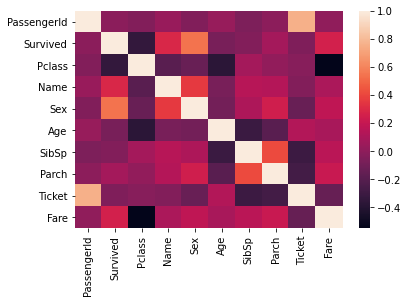

In [39]:
import seaborn as sns
sns.heatmap(train.corr())

In [40]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB


In [65]:
train["Embarked"] = train["Embarked"].replace(0, "S")
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [66]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [68]:
train = train.interpolate(method="linear", limit_direction="forward")

In [70]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
my_list = train["Embarked"].unique().tolist()
my_dict = {x : index for index, x in enumerate(my_list)}
train["Embarked"] = train["Embarked"].map(my_dict)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,0,7.2500,0
1,2,1,1,2,1,38.0,1,0,1,71.2833,1
2,3,1,3,3,1,26.0,0,0,2,7.9250,0
3,4,1,1,2,1,35.0,1,0,3,53.1000,0
4,5,0,3,1,0,35.0,0,0,4,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,6,0,27.0,0,0,677,13.0000,0
887,888,1,1,3,1,19.0,0,0,678,30.0000,0
888,889,0,3,3,1,22.5,1,2,614,23.4500,0
889,890,1,1,1,0,26.0,0,0,679,30.0000,1


In [110]:
del train["Pclass"], test["Pclass"]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),train["Survived"])

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

reg = LogisticRegression()
reg.fit(X_train, y_train)

svc = SVC(C=1.0)
svc.fit(X_train, y_train)

C:\Users\d\anaconda3\envs\tensorflow2_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [124]:
reg.predict_proba(X_test)

array([[0.30561076, 0.69438924],
       [0.85067157, 0.14932843],
       [0.59721025, 0.40278975],
       [0.82944923, 0.17055077],
       [0.91344217, 0.08655783],
       [0.34676789, 0.65323211],
       [0.86149297, 0.13850703],
       [0.91220008, 0.08779992],
       [0.29950291, 0.70049709],
       [0.14213593, 0.85786407],
       [0.34843529, 0.65156471],
       [0.86072029, 0.13927971],
       [0.27979661, 0.72020339],
       [0.79011951, 0.20988049],
       [0.85284182, 0.14715818],
       [0.87464805, 0.12535195],
       [0.35194596, 0.64805404],
       [0.82084621, 0.17915379],
       [0.8305803 , 0.1694197 ],
       [0.88927415, 0.11072585],
       [0.3495107 , 0.6504893 ],
       [0.85020698, 0.14979302],
       [0.28379213, 0.71620787],
       [0.87167584, 0.12832416],
       [0.82811769, 0.17188231],
       [0.84821198, 0.15178802],
       [0.31771042, 0.68228958],
       [0.1744469 , 0.8255531 ],
       [0.87955217, 0.12044783],
       [0.83460133, 0.16539867],
       [0.

In [94]:
test["Sex"] = test["Sex"].apply(lambda x : 0 if x == 'male' else 1)
test["Name"] = test["Name"].apply(lambda x : x.split(",")[1])
test["Name"] = test["Name"].apply(lambda x : x.split(".")[0])
mylist = test["Name"].unique().tolist()

dict = { x : index+1 for index, x in enumerate(mylist)}
test["Name"] = test["Name"].map(dict)



In [95]:
ticket = test["Ticket"].unique().tolist()

mydict = {x : index for index, x in enumerate(ticket)}

test["Ticket"] = test["Ticket"].map(mydict)

In [96]:
test["Embarked"] = test["Embarked"].replace(0, "S")
test = test.interpolate(method="linear", limit_direction="forward")

In [97]:
my_list = test["Embarked"].unique().tolist()
my_dict = {x : index for index, x in enumerate(my_list)}
test["Embarked"] = test["Embarked"].map(my_dict)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,1,34.5,0,0,0,7.8292,NaN,0
1,893,3,2,1,47.0,1,0,1,7.0000,NaN,1
2,894,2,1,1,62.0,0,0,2,9.6875,NaN,0
3,895,3,1,1,27.0,0,0,3,8.6625,NaN,1
4,896,3,2,1,22.0,1,1,4,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,33.5,0,0,358,8.0500,NaN,1
414,1306,1,9,1,39.0,0,0,359,108.9000,C105,2
415,1307,3,1,1,38.5,0,0,360,7.2500,NaN,1
416,1308,3,1,1,38.5,0,0,361,8.0500,NaN,1


In [100]:
del test['Cabin']

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


In [126]:
del test["Parch"], test["Ticket"]

In [127]:
del test["Age"]

<AxesSubplot:>

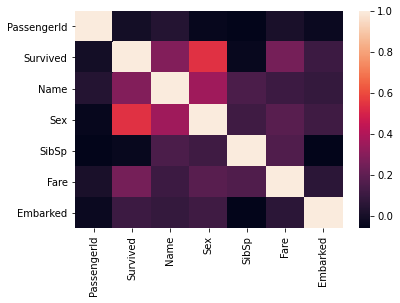

In [121]:
sns.heatmap(train.corr())

In [128]:
test

,PassengerId,Name,Sex,SibSp,Fare,Embarked
0,892,1,1,0,7.8292,0
1,893,2,1,1,7.0000,1
2,894,1,1,0,9.6875,0
3,895,1,1,0,8.6625,1
4,896,2,1,1,12.2875,1
...,...,...,...,...,...,...
413,1305,1,1,0,8.0500,1
414,1306,9,1,0,108.9000,2
415,1307,1,1,0,7.2500,1
416,1308,1,1,0,8.0500,1


In [129]:
predict = reg.predict(test)
result = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : predict
})

In [133]:
predict = svc.predict(test)
result = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : predict
})

In [134]:
result.to_csv('./data/result.csv', index=False)